In [1]:
import seaborn as sns
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
from sklearn.mixture import GMM

/home/kei0s/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


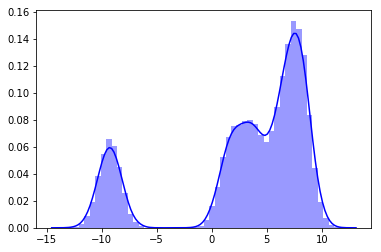

In [48]:
no_centers = 3
X, y = make_blobs(n_samples=30000, n_features=2, centers=no_centers, random_state=20, cluster_std=1.0)
# print(X)

# plt.scatter(X[:,0], X[:,1], c=y, marker = 'x')
x = X
X1 = X[:,0]
X2 = X[:,1]
# X3 = X[:,2]

# gmm = GMM(n_components=2).fit(X)
# labels = gmm.predict(X)
# plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
# X1 = list(set(X1))
# X3 = list(set(X1+X3))
X = np.hstack([X1,X2])

sns.distplot(X, color='b')

# Change for multi varibable according to ur needs
s_p = 0.5 * np.ones((no_centers, len(X)))
mu = np.random.random(no_centers)*10 # mean of the gaussian
# print("mu before cycle : ", mu)
sigma = np.ones(no_centers) # std of the gaussian
bayes_both = np.zeros((no_centers,len(X)))


In [3]:

for i in range(100):
    # E step
    # sc.norm used to find the probabilty density the same thing as P(x|b)
    bayes_both[0] = s_p[0] * sc.norm.pdf(X,mu[0],sigma[0])
#     print(bayes_both)
    bayes_both[1] = s_p[1] * sc.norm.pdf(X,mu[1],sigma[1])
    bayes_both[2] = s_p[2] * sc.norm.pdf(X,mu[2],sigma[2])
    Sum = np.sum(bayes_both, axis=0)
    bayes_both = bayes_both / Sum # this is for bi and ai
    
    # M step
    s_p = np.sum(bayes_both,axis=1) / len(X)       
    mu = np.sum(bayes_both*X, axis=1) / np.sum(bayes_both, axis=1)
    #Remember variance is the square of sigma
    sigma = np.sqrt(np.sum(bayes_both*pow(X - mu[:,np.newaxis],2),axis=1) / np.sum(bayes_both,axis=1))
    variance = sigma**2


print ("mu:", mu, "sigma:", sigma, "Variance:",variance)     

mu: [ 7.4524921  -9.26477082  2.96589978] sigma: [1.20137267 1.00268909 1.56320142] Variance: [1.44329628 1.00538542 2.44359869]


In [52]:
from sklearn.mixture import GaussianMixture as gmm
model = gmm(n_components=3, random_state=10, max_iter=10, covariance_type='full')
model.fit(X.reshape(-1,1))


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=10,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [8]:
Variance = model.covariances_
Means = model.means_
print("Means : ",Means, "\n\nVariance : ", Variance)
# model.predict(x)

Means :  [[-9.26477079]
 [ 7.3862312 ]
 [ 2.84410885]] 

Variance :  [[[1.00538651]]

 [[1.55074931]]

 [[2.20244056]]]


In [53]:
X
# print(len(bayes_both))
# print(X.size)

array([-8.54259441, -8.42681687,  1.59918123, ...,  3.43290809,
        4.62791865,  6.23755688])